In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
import plotly.express as px


In [2]:

# Load the dataset

df = pd.read_csv('/content/cnbc_news_datase.csv')

In [4]:
df.head()
df.columns

Index(['title', 'url', 'published_at', 'author', 'publisher',
       'short_description', 'keywords', 'header_image', 'raw_description',
       'description', 'scraped_at'],
      dtype='object')

In [9]:
# Convert 'published_at' to datetime and set utc=True
df['published_at'] = pd.to_datetime(df['published_at'], utc=True)


In [10]:

# Basic info and summary statistics
print(df.info())
print(df.describe())

# Set up the plotting style
plt.style.use('seaborn')

sns.set_palette("viridis")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   title              625 non-null    object             
 1   url                625 non-null    object             
 2   published_at       625 non-null    datetime64[ns, UTC]
 3   author             397 non-null    object             
 4   publisher          625 non-null    object             
 5   short_description  609 non-null    object             
 6   keywords           625 non-null    object             
 7   header_image       625 non-null    object             
 8   raw_description    594 non-null    object             
 9   description        593 non-null    object             
 10  scraped_at         625 non-null    object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 53.8+ KB
None
                                            

<ipython-input-10-80ecf7625e98>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


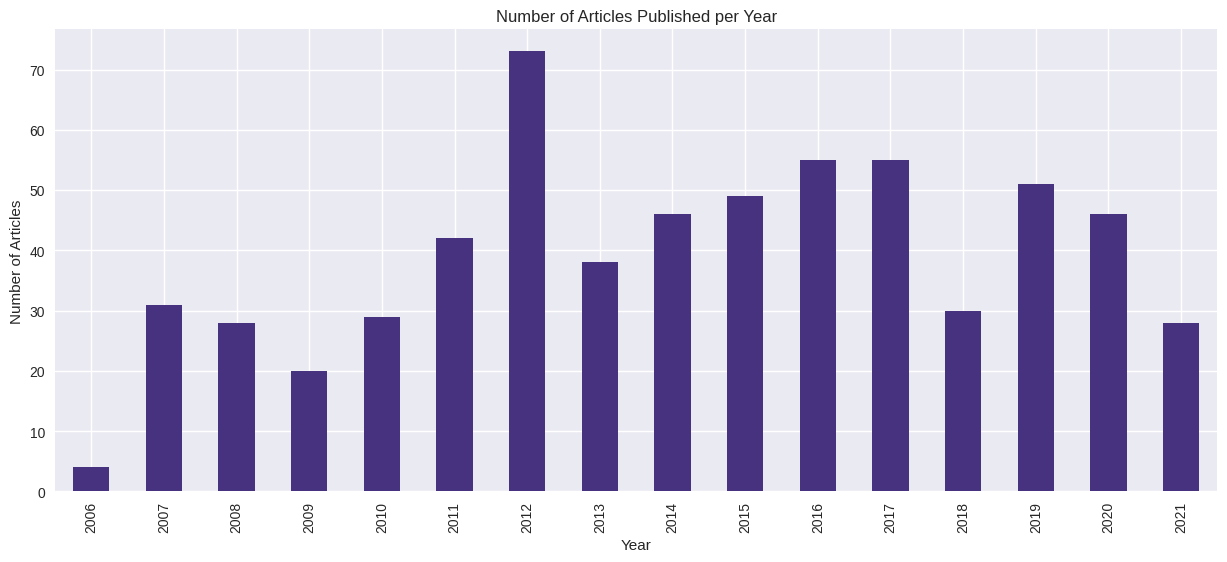

In [11]:
# 1. Distribution of articles over time
plt.figure(figsize=(15, 6))
# Ensure the 'published_at' column is in datetime format
#df['published_at'] = pd.to_datetime(df['published_at'])
df['published_at'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

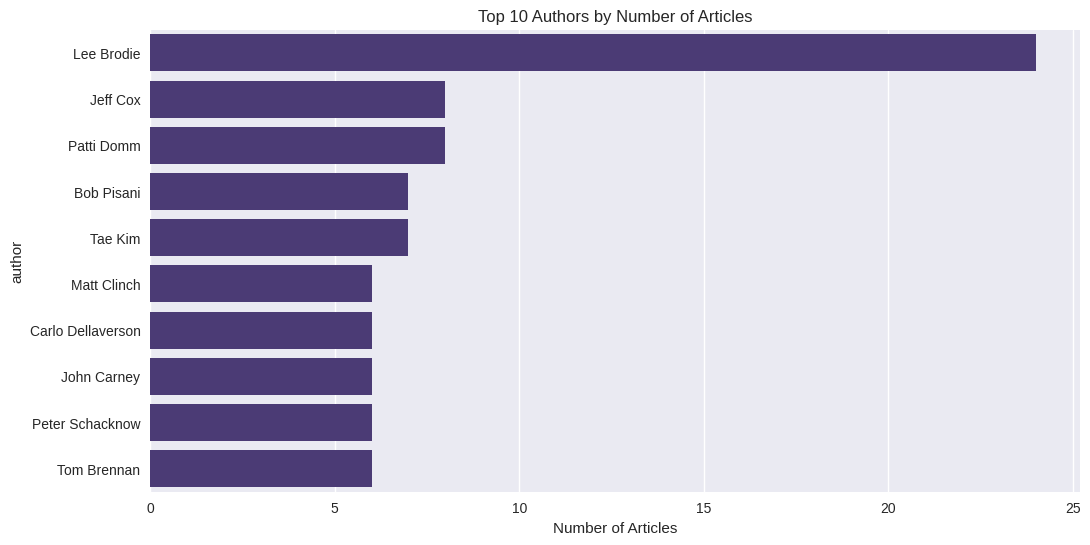

In [12]:
# 2. Top 10 authors by number of articles
plt.figure(figsize=(12, 6))
top_authors = df['author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Authors by Number of Articles')
plt.xlabel('Number of Articles')
plt.show()


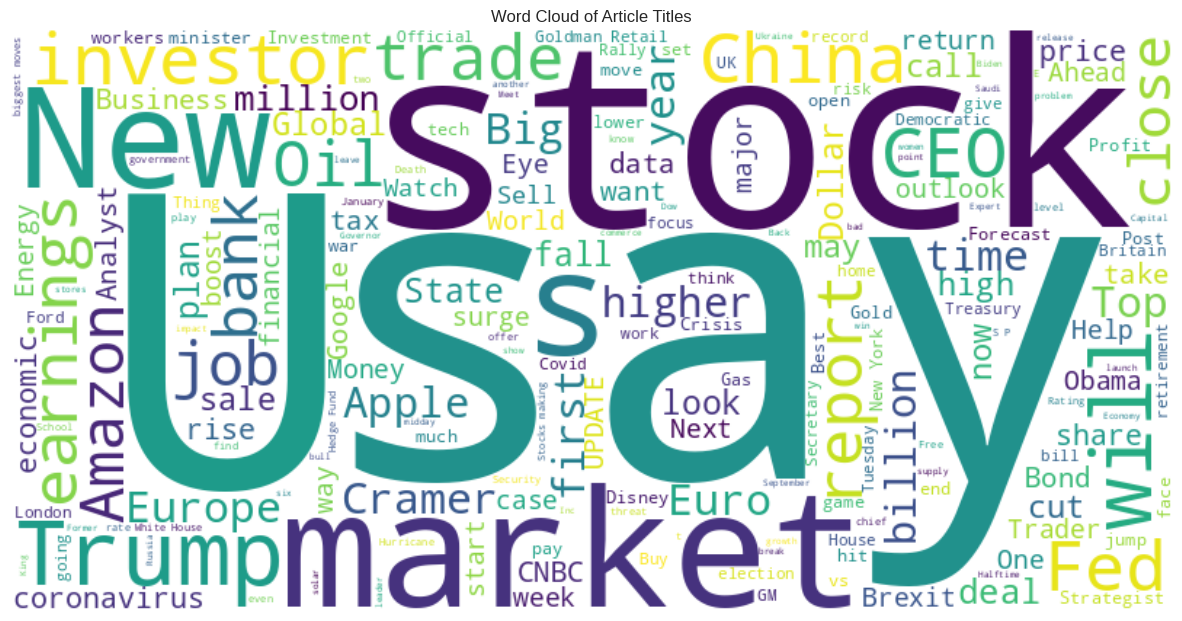

In [13]:
# 3. Word cloud of article titles
text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Article Titles')
plt.show()

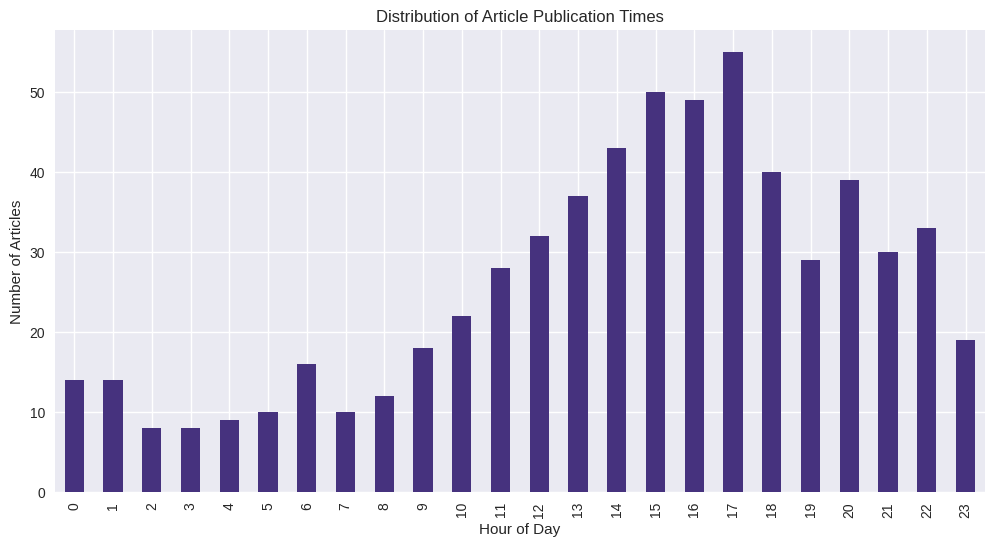

In [14]:
# 4. Distribution of article publication times
plt.figure(figsize=(12, 6))
df['published_at'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Article Publication Times')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()

In [15]:
# 5. Interactive time series plot using Plotly
df['date'] = df['published_at'].dt.date
articles_per_day = df.groupby('date').size().reset_index(name='count')
fig = px.line(articles_per_day, x='date', y='count', title='Number of Articles Published Over Time')
fig.show()

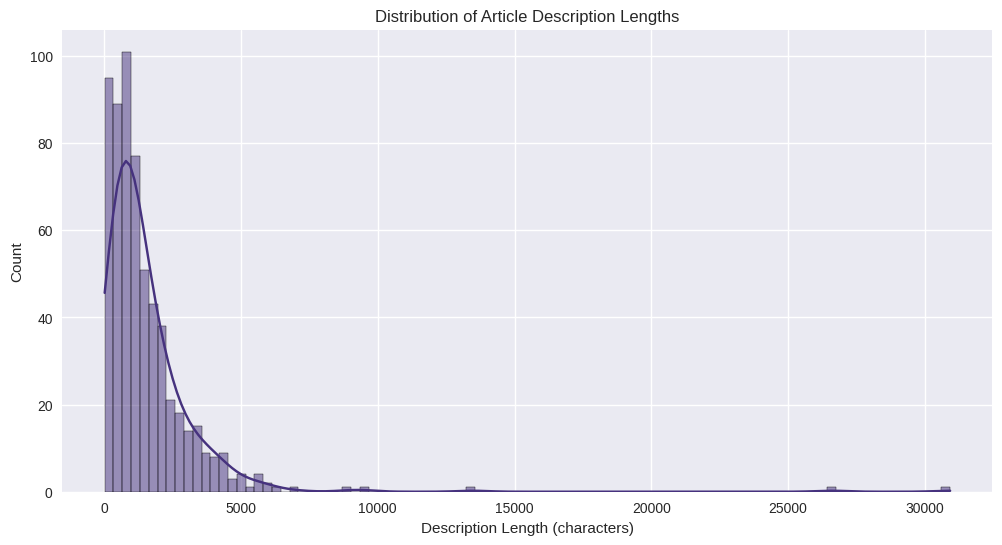

In [21]:
# 6. Distribution of article descriptions length
plt.figure(figsize=(12, 6))
sns.histplot(df['short_description'].str.len(), kde=True)
plt.title('Distribution of Article Description Lengths')
plt.xlabel('Description Length (characters)')
plt.show()

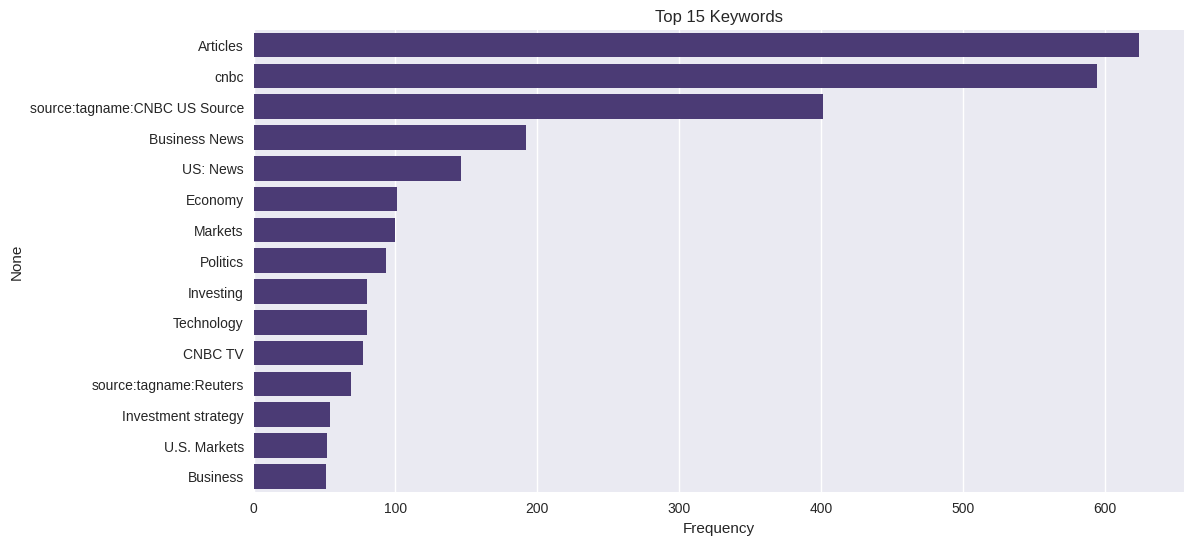

EDA completed. Check the visualizations for insights!


In [22]:
# 7. Top keywords (assuming 'keywords' column exists and contains comma-separated values)
if 'keywords' in df.columns:
    all_keywords = [keyword.strip() for keywords in df['keywords'].dropna() for keyword in keywords.split(',')]
    keyword_freq = pd.Series(all_keywords).value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=keyword_freq.head(15).values, y=keyword_freq.head(15).index)
    plt.title('Top 15 Keywords')
    plt.xlabel('Frequency')
    plt.show()

print("EDA completed. Check the visualizations for insights!")